# üß† Projet 1 : Analyse des ventes d‚Äôun e-commerce



## üéØ Objectif  
Identifier les **produits performants**, les **comportements clients** et les **p√©riodes fortes/faibles**.



## üìÅ Donn√©es utilis√©es  

- `date_commande`  
- `produit`, `cat√©gorie`  
- `quantit√©`, `prix_unitaire`  
- `client_id`, `r√©gion`, `revenu`  
- `canal` (web, mobile, magasin)  

üëâ *Un jeu de donn√©es simul√© est utilis√© pour illustrer l'analyse.*

---

## üìä Visualisations √† inclure

| Objectif                                 | Type de graphique              |
|------------------------------------------|-------------------------------|
| R√©partition des ventes par cat√©gorie     | Histogramme / Pie chart       |
| √âvolution des ventes dans le temps       | Line chart                    |
| Corr√©lation prix vs. quantit√©            | Scatter plot                  |
| Valeurs extr√™mes dans les montants       | Boxplot                       |
| Activit√© par heure et par jour           | Heatmap                       |

---

## üß† Comp√©tences m√©tiers mobilis√©es

- ‚úÖ Calcul des **KPI** : chiffre d'affaires, panier moyen  
- üìà D√©tection de **saisonnalit√©s** : pics de vente par semaine/jour  
- üë• **Segmentation clients** : par r√©gion, revenu ou canal d‚Äôachat  
- ü•á Analyse des **produits performants** : top ventes par cat√©gorie  





















## üîç √âtapes de l‚Äôanalyse



### 1. Chargement des donn√©es (simul√©es)  
> On g√©n√®re 1000 commandes al√©atoires avec des champs typiques d‚Äôun site e-commerce.

---

In [6]:
import pandas as pd
import numpy as np

# üì¶ Param√®tres de base
np.random.seed(42)
n_commandes = 400  # nombre total de commandes
max_produits_par_commande = 5  # une commande peut contenir 1 √† 5 produits

# üóì Dates de commande
dates = pd.date_range("2024-01-01", "2024-06-30").to_list()

# üë• Clients
client_ids = np.random.choice(range(1000, 1100), size=n_commandes, replace=True)
regions = ["Nord", "Sud", "Est", "Ouest"]
revenus_par_r√©gion = {
    "Nord": (2200, 400),
    "Sud": (2800, 600),
    "Est": (2000, 300),
    "Ouest": (2500, 500)
}

# üì¶ Produits et cat√©gories
produits_info = {
    "T-shirt": ("Homme", 10, 25),
    "Pantalon": ("Homme", 30, 60),
    "Chaussures": ("Femme", 50, 100),
    "Sac": ("Femme", 20, 50),
    "Veste": ("Enfant", 40, 90)
}
produits = list(produits_info.keys())

# üìë Liste des lignes de commande
lignes = []

commande_id = 1
for i in range(n_commandes):
    date = np.random.choice(dates)
    client = client_ids[i]
    region = np.random.choice(regions)
    canal = np.random.choice(["web", "mobile", "magasin"], p=[0.4, 0.3, 0.3])

    revenu = max(1000, np.random.normal(*revenus_par_r√©gion[region]))  # pas de revenu < 1000
    nb_produits = np.random.randint(1, max_produits_par_commande + 1)
    produits_disponibles = np.random.choice(produits, size=nb_produits, replace=False)

    heure = np.random.randint(8, 22)

    for produit in produits_disponibles:
        categorie, prix_min, prix_max = produits_info[produit]
        prix = np.round(np.random.uniform(prix_min, prix_max), 2)
        quantite = np.random.randint(1, 4) if prix < 50 else 1
        montant = prix * quantite

        lignes.append({
            "commande_id": commande_id,
            "date_commande": date,
            "produit": produit,
            "categorie": categorie,
            "quantit√©": quantite,
            "prix_unitaire": prix,
            "montant_commande": montant,
            "client_id": client,
            "r√©gion": region,
            "revenu": np.round(revenu, 2),
            "canal": canal,
            "jour_semaine": date.strftime("%A"),
            "heure_commande": heure
        })

    commande_id += 1

# üìä Cr√©ation du DataFrame final
df = pd.DataFrame(lignes)

# ‚úÖ Aper√ßu
df.head()


commande_id date_commande     produit categorie  quantit√©  prix_unitaire  \
0            1    2024-05-06         Sac     Femme         3          44.28   
1            2    2024-02-19         Sac     Femme         2          25.83   
2            2    2024-02-19       Veste    Enfant         1          79.79   
3            2    2024-02-19     T-shirt     Homme         3          23.35   
4            2    2024-02-19  Chaussures     Femme         1          51.38   

   montant_commande  client_id r√©gion   revenu   canal jour_semaine  \
0            132.84       1051    Est  2264.85     web       Monday   
1             51.66       1092   Nord  2020.28  mobile       Monday   
2             79.79       1092   Nord  2020.28  mobile       Monday   
3             70.05       1092   Nord  2020.28  mobile       Monday   
4             51.38       1092   Nord  2020.28  mobile       Monday   

   heure_commande  
0              17  
1              20  
2              20  
3              20  
4              20


### 2. Visualisation 1 : R√©partition des ventes par cat√©gorie  
- üìä **Histogramme horizontal** : total des ventes par cat√©gorie  
- ü•ß **Camembert** : part de chaque cat√©gorie dans le chiffre d'affaires global  


<ipython-input-14-431f5bb7171e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ca_par_categorie.values, y=ca_par_categorie.index, palette="Blues_d")


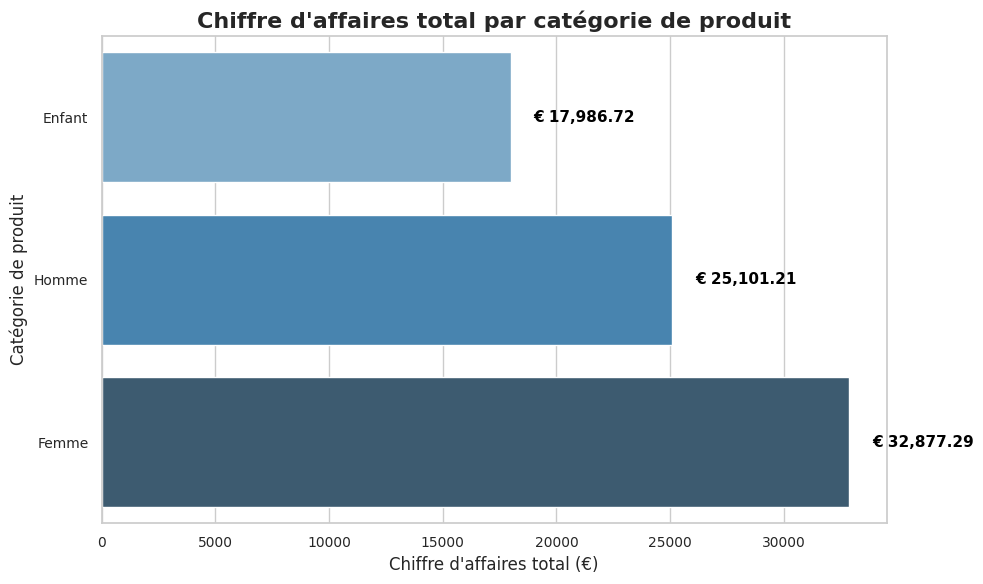

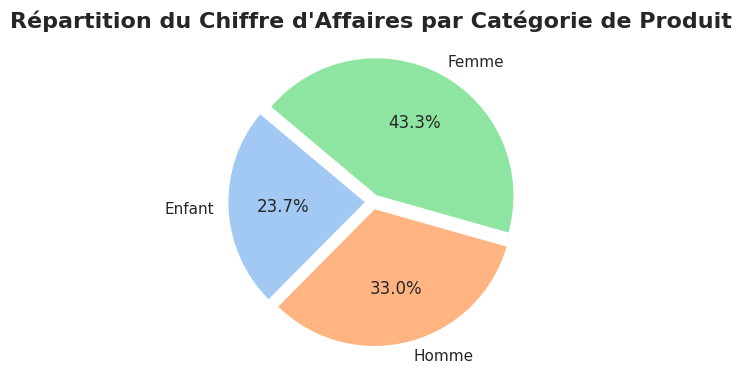

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# üé® Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# üî¢ Agr√©gation du CA par cat√©gorie
ca_par_categorie = df.groupby("categorie")["montant_commande"].sum().sort_values()

# üìä 1. Histogramme horizontal avec plus de d√©tails
plt.figure(figsize=(10, 6))
sns.barplot(x=ca_par_categorie.values, y=ca_par_categorie.index, palette="Blues_d")
plt.title("Chiffre d'affaires total par cat√©gorie de produit", fontsize=16, weight='bold')
plt.xlabel("Chiffre d'affaires total (‚Ç¨)", fontsize=12)
plt.ylabel("Cat√©gorie de produit", fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# Ajouter des valeurs sur les barres
for index, value in enumerate(ca_par_categorie.values):
    plt.text(value + 1000, index, f'‚Ç¨ {value:,.2f}', va='center', fontweight='bold', fontsize=11, color="black")

plt.tight_layout()
plt.show()

# ü•ß 2. Camembert avec l√©gendes et annotations
plt.figure(figsize=(4, 4))
plt.pie(ca_par_categorie.values,
        labels=ca_par_categorie.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"),
        explode=[0.05]*len(ca_par_categorie))

plt.title("R√©partition du Chiffre d'Affaires par Cat√©gorie de Produit", fontsize=16, weight='bold')
plt.axis("equal")  # cercle parfait
plt.tight_layout()
plt.show()



### 3. Visualisation 2 : √âvolution du CA dans le temps  
- üìà **Courbe temporelle** du chiffre d‚Äôaffaires quotidien  
- üìå Rep√©rage des **tendances**, **pics** et **creux**  

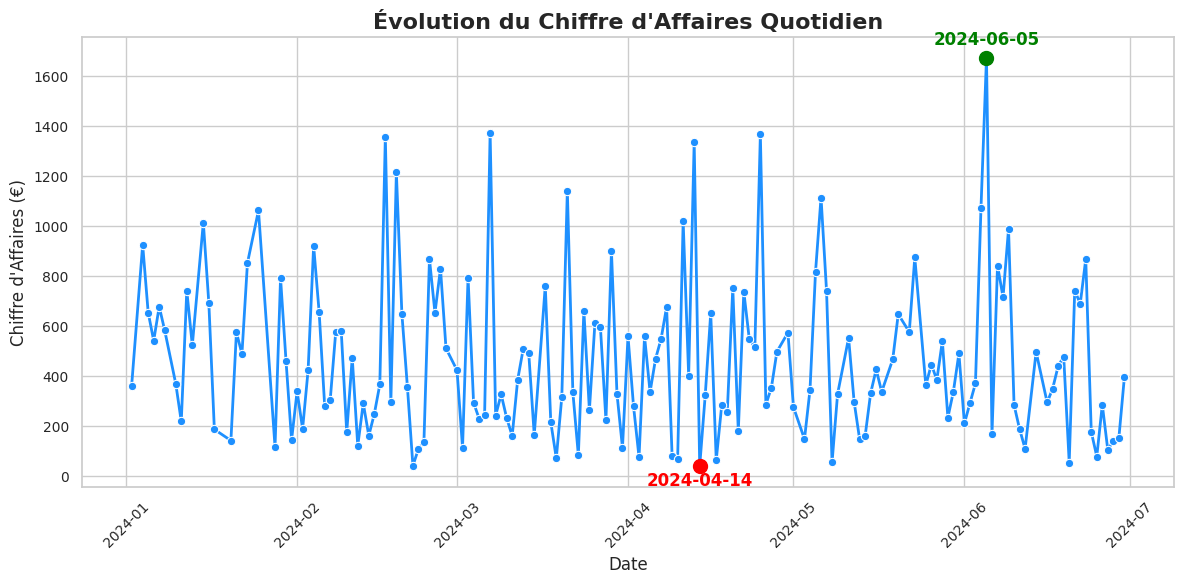

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# üî¢ Agr√©gation du CA par jour
ca_par_jour = df.groupby("date_commande")["montant_commande"].sum()

# üìà Courbe temporelle du Chiffre d'Affaires
plt.figure(figsize=(12, 6))
sns.lineplot(x=ca_par_jour.index, y=ca_par_jour.values, marker="o", color="dodgerblue", linewidth=2)

# üè∑Ô∏è Ajouter des titres et labels
plt.title("√âvolution du Chiffre d'Affaires Quotidien", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Chiffre d'Affaires (‚Ç¨)", fontsize=12)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilit√©
plt.tick_params(axis='both', labelsize=10)

# üìå Rep√©rage des pics et creux
max_ca = ca_par_jour.idxmax()
min_ca = ca_par_jour.idxmin()
max_value = ca_par_jour.max()
min_value = ca_par_jour.min()

# Points max et min avec des couleurs sp√©cifiques
plt.scatter(max_ca, max_value, color='green', s=100, label=f"Pic: {max_ca.strftime('%Y-%m-%d')}", zorder=5)
plt.scatter(min_ca, min_value, color='red', s=100, label=f"Creux: {min_ca.strftime('%Y-%m-%d')}", zorder=5)

# Affichage des dates sur les points
plt.text(max_ca, max_value + 50, f"{max_ca.strftime('%Y-%m-%d')}", color="green", ha='center', fontsize=12, weight='bold')
plt.text(min_ca, min_value - 80, f"{min_ca.strftime('%Y-%m-%d')}", color="red", ha='center', fontsize=12, weight='bold')

# Affichage de la courbe
plt.tight_layout()
plt.show()


### 4. Visualisation 3 : Corr√©lation prix / quantit√©
- üîç Scatter plot pour observer si les produits moins chers sont achet√©s en plus grande quantit√©

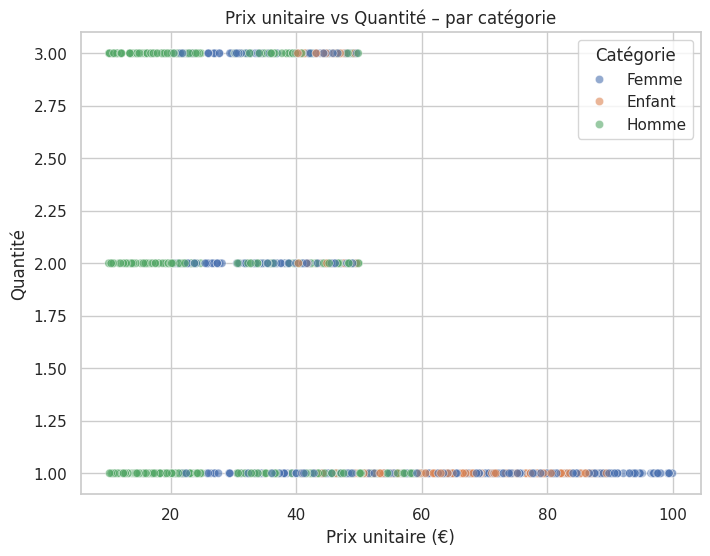

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='prix_unitaire', y='quantit√©', hue='categorie', alpha=0.6)
plt.title("Prix unitaire vs Quantit√© ‚Äì par cat√©gorie")
plt.xlabel("Prix unitaire (‚Ç¨)")
plt.ylabel("Quantit√©")
plt.legend(title='Cat√©gorie')
plt.show()


### 5. Visualisation 4 : Valeurs extr√™mes
- üì¶ Boxplot par cat√©gorie pour identifier des paniers anormalement √©lev√©s ou faibles

In [54]:
# üÜî S'assurer d‚Äôavoir un identifiant de commande
# Si tu n‚Äôen as pas encore, on cr√©e un identifiant unique de commande par regroupement logique
df['commande_id'] = df.groupby(['client_id', 'date_commande', 'heure_commande']).ngroup()

# üí∞ Calcul du montant total par commande
df_commande = df.groupby('commande_id').agg({
    'montant_commande': 'sum',
    'client_id': 'first',
    'r√©gion': 'first',
    'canal': 'first',
    'date_commande': 'first',
    'heure_commande': 'first'
}).reset_index()

# üñ•Ô∏è Aper√ßu
df_commande.head()

# üì¶ Calcul du montant de commande √† partir de df
df["montant_ligne"] = df["quantit√©"] * df["prix_unitaire"]

# ‚úÖ G√©n√©rer les revenus clients s'ils n'existent pas d√©j√†
if "revenu" not in df.columns:
    revenus_clients = pd.DataFrame({
        "client_id": df["client_id"].unique(),
        "revenu": np.random.normal(loc=2500, scale=800, size=len(df["client_id"].unique())).round(2)
    })
    revenus_clients["revenu"] = revenus_clients["revenu"].clip(lower=500)
    df = df.merge(revenus_clients, on="client_id", how="left")

# üßæ Agr√©ger au niveau commande
df_commande = df.groupby("commande_id").agg({
    "date_commande": "first",
    "client_id": "first",
    "r√©gion": "first",
    "canal": "first",
    "heure_commande": "first",
    'categorie': lambda x: x.mode()[0],  # cat√©gorie dominante
    "montant_ligne": "sum",
    "revenu": "first"
}).reset_index().rename(columns={"montant_ligne": "montant_commande"})

# üïí Ajout du jour de la semaine
df_commande["jour_semaine"] = df_commande["date_commande"].dt.day_name()

# ‚úÖ V√©rification
df_commande.head()

commande_id date_commande  client_id r√©gion    canal  heure_commande  \
0            0    2024-03-10       1000  Ouest   mobile              17   
1            1    2024-03-17       1000    Est  magasin              20   
2            2    2024-04-15       1000   Nord   mobile              17   
3            3    2024-05-19       1000    Est  magasin              20   
4            4    2024-06-02       1000  Ouest   mobile              15   

  categorie  montant_commande   revenu jour_semaine  
0     Homme            233.48  2356.20       Sunday  
1     Femme            304.86  1538.10       Sunday  
2    Enfant            164.58  2895.54       Monday  
3     Homme             14.87  2332.50       Sunday  
4     Femme            292.86  2831.00       Sunday

<ipython-input-55-2d47e2325169>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_commande, x='categorie', y='montant_commande', palette='Pastel1')


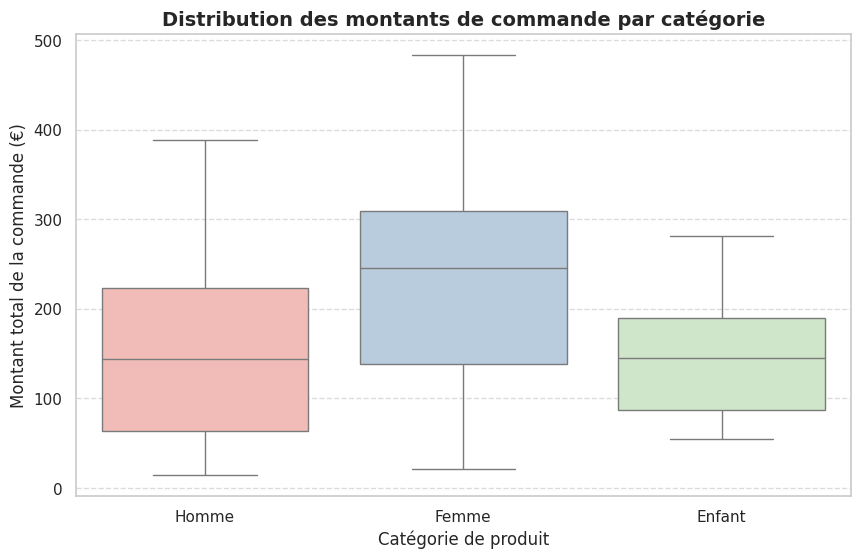

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_commande, x='categorie', y='montant_commande', palette='Pastel1')

plt.title("Distribution des montants de commande par cat√©gorie", fontsize=14, weight='bold')
plt.xlabel("Cat√©gorie de produit", fontsize=12)
plt.ylabel("Montant total de la commande (‚Ç¨)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




### 6. Visualisation 5 : Activit√© par jour et heure  
- üî• **Heatmap** croisant le jour de la semaine et l‚Äôheure de la commande  
- Permet de d√©tecter les **pics horaires d'activit√©**


<ipython-input-56-3dd0c6215259>:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


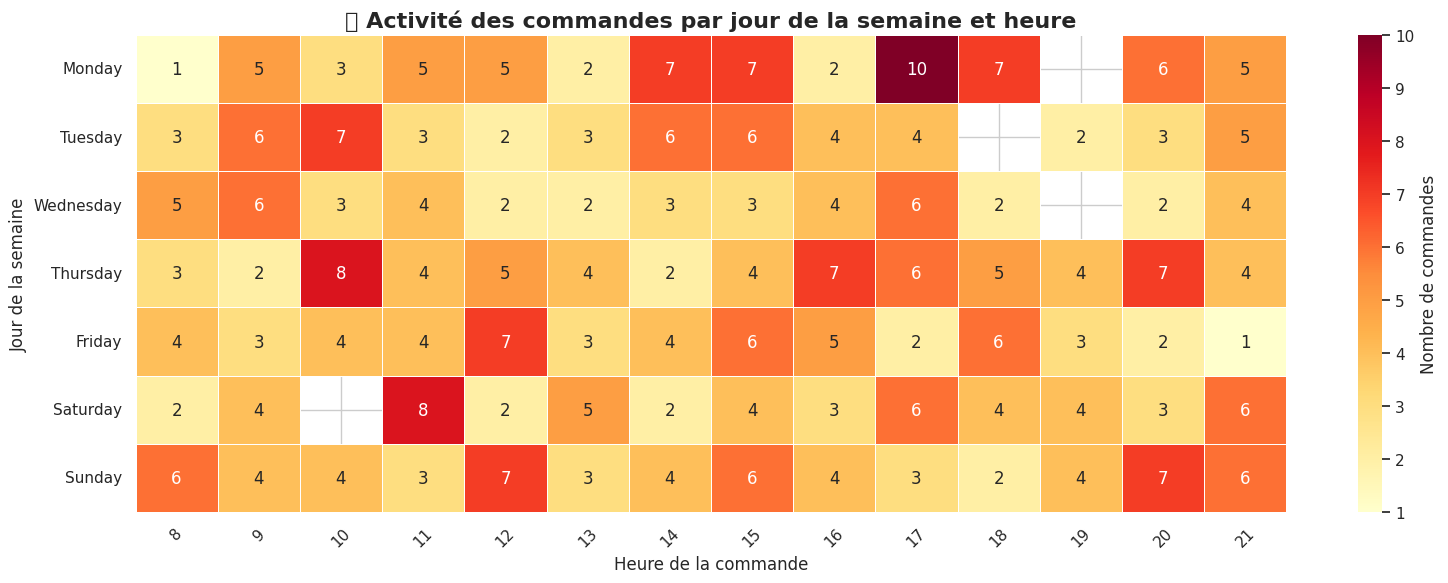

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# üßÆ Comptage du nombre de commandes par jour et heure
heatmap_data = df_commande.groupby(['jour_semaine', 'heure_commande']).size().reset_index(name='nb_commandes')

# üîÅ R√©organisation pour la heatmap
jours_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_data.pivot(index='jour_semaine', columns='heure_commande', values='nb_commandes').reindex(jours_order)

# üî• Affichage de la heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_pivot, cmap="YlOrRd", linewidths=0.5, annot=True, fmt=".0f", cbar_kws={'label': 'Nombre de commandes'})

plt.title("üî• Activit√© des commandes par jour de la semaine et heure", fontsize=16, weight='bold')
plt.xlabel("Heure de la commande", fontsize=12)
plt.ylabel("Jour de la semaine", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 7. Indicateurs cl√©s (KPI)
- üí∞ Chiffre d‚Äôaffaires total
- üì¶ Nombre de commandes
- üõí Panier moyen

In [58]:
import pandas as pd

# Cr√©ation d'une colonne "montant" pour chaque ligne
df['montant'] = df['quantit√©'] * df['prix_unitaire']

# üí∞ Chiffre d'affaires total
chiffre_affaires_total = df['montant'].sum()

# üì¶ Nombre de commandes (en supposant qu‚Äôune ligne = une commande)
nombre_commandes = df.shape[0]

# üõí Panier moyen
panier_moyen = chiffre_affaires_total / nombre_commandes

# üìã Affichage des KPI
print("üí∞ Chiffre d'affaires total : {:.2f} ‚Ç¨".format(chiffre_affaires_total))
print("üì¶ Nombre de commandes : {}".format(nombre_commandes))
print("üõí Panier moyen : {:.2f} ‚Ç¨".format(panier_moyen))


üí∞ Chiffre d'affaires total : 75965.22 ‚Ç¨
üì¶ Nombre de commandes : 1169
üõí Panier moyen : 64.98 ‚Ç¨


### 8. Analyse de saisonnalit√©
- üìÖ Ventes hebdomadaires pour d√©tecter une logique de saison ou l‚Äôimpact de campagnes promotionnelles

<ipython-input-59-4b1c04039e3b>:21: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


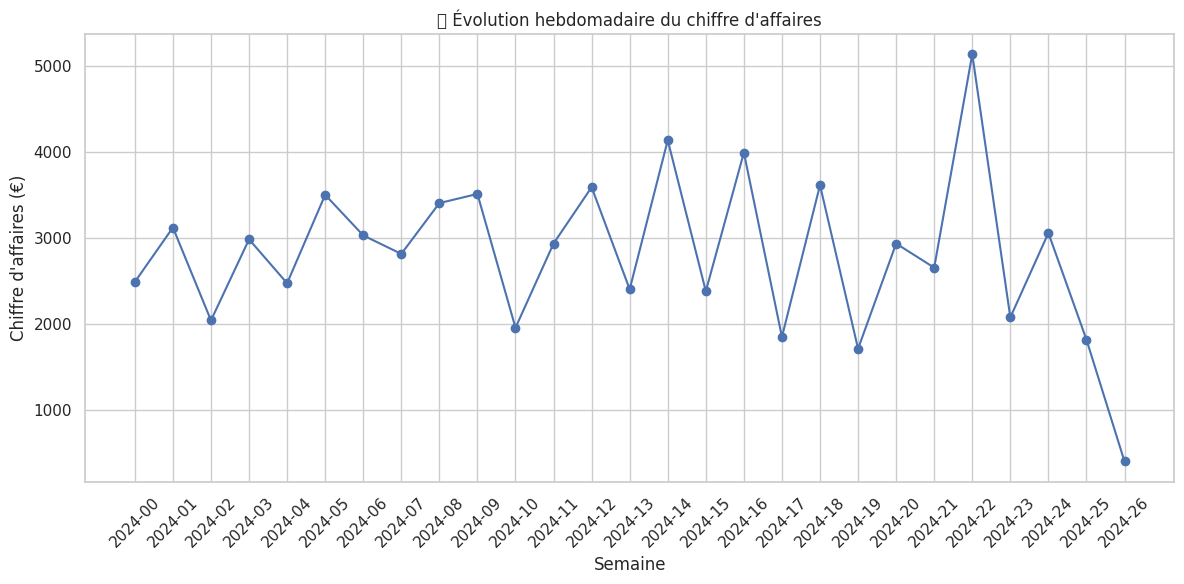

In [59]:
import matplotlib.pyplot as plt

# S'assurer que la colonne 'date_commande' est bien au format datetime
df['date_commande'] = pd.to_datetime(df['date_commande'])

# Extraire la semaine et l'ann√©e de chaque commande
df['annee_semaine'] = df['date_commande'].dt.strftime('%Y-%U')  # ex: '2024-17'

# Recalcul du chiffre d'affaires par semaine
df['montant'] = df['quantit√©'] * df['prix_unitaire']
ca_hebdo = df.groupby('annee_semaine')['montant'].sum().reset_index()

# Tracer l‚Äô√©volution du chiffre d‚Äôaffaires hebdomadaire
plt.figure(figsize=(12, 6))
plt.plot(ca_hebdo['annee_semaine'], ca_hebdo['montant'], marker='o', linestyle='-')
plt.title("üìÖ √âvolution hebdomadaire du chiffre d'affaires")
plt.xlabel("Semaine")
plt.ylabel("Chiffre d'affaires (‚Ç¨)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
